## Please download the new class notes.
### Step 1 : Navigate to the directory where your files are stored.  
Open a terminal. 
<br>Using `cd`, navigate to *inside* the ILAS_Python_for_engineers folder on your computer. 
### Step 3 : Update the course notes by downloading the changes
In the terminal type:

>`git add -A
git commit -m "commit"
git fetch upstream
git merge -X theirs upstream/master`


# Plotting and Analysing Plotted Data

<br> <a href='#Matplotlib'>Matplotlib</a>
<br> <a href='#Scipy'>Scipy</a> 
<br> <a href='#LineScatterPlots'>Line and Scatter Plots</a> 
	<br> &emsp;&emsp; <a href='#AddingLabelsLegendTitle'>Adding Labels, Legend and Title</a> 
    <br> &emsp;&emsp; <a href='#SettingAxisLimits'>Setting the Axis Limits</a> 
<br> <a href='#MultiplePlots'>Multiple Plots</a> 
<br> <a href='#SavingPlot'>Saving a Plot</a> 
<br> <a href='#ImportingDataDelimitedFiles'>Importing Data from Delimited Files</a> 
<br> <a href='#CurveFitting'>Curve Fitting</a> 
    <br> &emsp;&emsp; <a href='#FittingLinearFunction'>Fitting a Linear Function</a>
     <br> &emsp;&emsp; <a href='#RootMeanSquareError'>Root Mean Square Error</a>
     <br> &emsp;&emsp; <a href='#FittingPolynomialFunction'>Fitting a Polynomial Function</a>
     <br> &emsp;&emsp; <a href='#FittingArbitraryFunction'>Fitting an Arbitrary Function</a>    
<a href='#Interpolation'>Interpolation</a>
    <br> &emsp;&emsp; <a href='#LinearInterpolation'>Linear Interpolation</a> 
    <br> &emsp;&emsp; <a href='#ImprovedInterpolation'>Improved Interpolation?</a> 
<br> <a href='#BarChartsHistograms'>Bar Charts and Histograms</a> 
     <br> &emsp;&emsp; <a href='#BarCharts'>Bar Charts</a> 
     <br> &emsp;&emsp; <a href='#Histograms'>Histograms</a> 
<br> <a href='#Visualising2DArrays'>Visualising 2D Arrays</a>
<br> <a href='#3DPlotting'>3D Plotting</a> 
<br> <a href='#Summary'>Summary</a> 
<br> <a href='#TestYourselfExercises'>Test-Yourself Exercises</a>
<br> <a href='#ReviewExercises'>Review Exercises</a>

### Lesson Goal

1. Plot data imported from a file 
2. Perform analysis to file a curve to experimental data.   

### Fundamental programming concepts
 - Working with multiple file types
 - Exploiting computational analysis techniques

## Matplotlib
<a id='Matplotlib'></a>
Matplotlib is the most widely used Python package for plotting.

It's functionality is huge.

Today's seminar will introduce the core functionality of Matplotlib.





In [3]:
import numpy as np

# plotting
import matplotlib.pyplot as plt

# colours
import matplotlib.cm as cm

# Plotting in 3D
from mpl_toolkits.mplot3d import axes3d

## SciPy
<a id='SciPy'></a>
Both Numpy and Matplotlib are part of SciPy; a Python package for mathematics, science, and engineering related computing.

Today we will also be importing functions from the SciPy package.

To display plots in Jupyter Notebook, we must also have the following line in the notebook *before* generating the plot:

In [4]:
%matplotlib inline


To display plots when running a .py file (e.g. in Spyder, we must also have the following line in the notebook *after* generating the plot:

In [5]:
plt.show()

Online resources for more Matplotlib functionality:
 - Matplotlib Gallery (http://matplotlib.org/gallery.html)
 - Github (http://gree2.github.io/python/2015/04/10/python-matplotlib-plotting-examples-and-exercises)
 
 

## Importing Data from Delimited Text Files
<a id='ImportingDataDelimitedTextFiles'></a>
In 02_DataStructures_LibraryFunctions.ipynb, we learnt to use the function `numpy.load.txt` to import and manipulate data from files e.g. .csv files.

__Remember__
<br>The file to be loaded must be in the same directory as your python program.
<br>Otherwise you must specify the the full path to the data file using / to seperate directory names. 
<br>The filename (or path plus filename) needs to be between "" quotation marks. 

To import the data from `sample_data/data.dat`:
>`0.000 1.053 2.105 3.158 4.211
74.452 48.348 68.733 59.796 54.123`


In [6]:
A = np.loadtxt('sample_data/sample_data.dat')
print(A)
print(type(A))
print(A[0][1])

[[ 1.053  2.105  3.158  4.211  6.065]
 [48.348 68.733 59.796 54.123 74.452]]
<class 'numpy.ndarray'>
2.105


The __delimiter__ should (sometimes) be specified.

This tells Python how to separate the data into the individual elements of an array. 

The default delimiter is a space.

(Data separated by spaces will be automatically be assigned different indices).

The __data type__ should (sometimes) be specified.

This tells Python how to separate the data into the individual elements of an array. 

The default data type is `float`.

If your data contains items that cannot be expressed as a float, importing it will cause an error unless the data-type is specified.

Mixed data types can be imported as `string` values. 

Data in `sample_data/sample_student_data.txt`:
- __delimiter__ : tab (`/t`) 
- __data type__ : string (float in some columns)

```Python
Subject	Sex	DOB	Height	Weight	BP
(ID)	M/F	dd/mm/yy	m	kg	mmHg
JW-1	M	19/12/1995	1.82	92.4	119/76
JW-2	M	11/01/1996	1.77	80.9	114/73
JW-3	F	02/10/1995	1.68	69.7	124/79
JW-6	M	06/07/1995	1.72	75.5	110/60
JW-7	F	28/03/1996	1.66	72.4	-
JW-9	F	11/12/1995	1.78	82.1	115/75
JW-10	F	07/04/1996	1.6	45	-/-
JW-11	M	22/08/1995	1.72	77.2	97/63
JW-12	M	23/05/1996	1.83	88.9	105/70
JW-14	F	12/01/1996	1.56	56.3	108/72
JW-15	F	01/06/1996	1.64	65	99/67
JW-16	M	10/09/1995	1.63	73	131/84
JW-17	M	17/02/1996	1.67	89.8	101/76
JW-18	M	31/07/1996	1.66	75.1	-/-
JW-19	F	30/10/1995	1.59	67.3	103/69
JW-22	F	09/03/1996	1.7	45	119/80
JW-23	M	15/05/1995	1.97	89.2	124/82
JW-24	F	01/12/1995	1.66	63.8	100/78
JW-25	F	25/10/1995	1.63	64.4	-/-
JW-26	M	17/04/1996	1.69	55	121/82
```

In [7]:
np.loadtxt('sample_data/sample_student_data.txt', delimiter="\t", dtype=str)

array([['Student', 'Sex', 'DOB', 'Height', 'Weight', 'BP'],
       ['(ID)', 'M/F', 'dd/mm/yy', 'm', 'kg', 'mmHg'],
       ['JW-1', 'M', '19/12/1995', '1.82', '92.4', '119/76'],
       ['JW-2', 'M', '11/01/1996', '1.77', '80.9', '114/73'],
       ['JW-3', 'F', '02/10/1995', '1.68', '69.7', '124/79'],
       ['JW-4', 'M', '11/01/1996', '1.77', '80.9', '114/73'],
       ['JW-5', 'F', '02/10/1995', '1.68', '69.7', '124/79'],
       ['JW-6', 'M', '06/07/1995', '1.72', '75.5', '110/60'],
       ['JW-7', 'F', '28/03/1996', '1.66', '72.4', '-'],
       ['JW-9', 'F', '11/12/1995', '1.78', '82.1', '115/75'],
       ['JW-10', 'F', '07/04/1996', '1.6', '45', '-/-'],
       ['JW-11', 'M', '22/08/1995', '1.72', '77.2', '97/63'],
       ['JW-12', 'M', '23/05/1996', '1.83', '88.9', '105/70'],
       ['JW-14', 'F', '12/01/1996', '1.56', '56.3', '108/72'],
       ['JW-15', 'F', '01/06/1996', '1.64', '65', '99/67'],
       ['JW-16', 'M', '10/09/1995', '1.63', '73', '131/84'],
       ['JW-17', 'M', '17/02

Regions can be selected, for example to select only numerical data. 

`skiprows` skips the first n lines. 

`usecols` specifies which columns to read, with 0 being the first. 

`usecols = (1, 4, 5)` : extracts the 2nd, 5th and 6th columns.
<br>`usecols = (3, 4)` : extracts the 4th and 5th columns (height and weight data).

In [8]:
students = np.loadtxt('sample_data/sample_student_data.txt', dtype=float, skiprows=9, usecols=(3,4))
print(students)

[[ 1.78 82.1 ]
 [ 1.6  45.  ]
 [ 1.72 77.2 ]
 [ 1.83 88.9 ]
 [ 1.56 56.3 ]
 [ 1.64 65.  ]
 [ 1.63 73.  ]
 [ 1.67 89.8 ]
 [ 1.66 75.1 ]
 [ 1.59 67.3 ]
 [ 1.7  45.  ]
 [ 1.97 89.2 ]
 [ 1.66 63.8 ]
 [ 1.63 64.4 ]
 [ 1.69 55.  ]]


You can now use the imported data as a regular Numpy array.



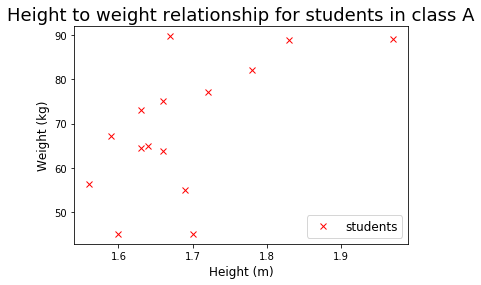

In [9]:
# Use indexing to select which ROWS and which COLUMNS to plot
plt.plot(students[:, 0], students[:, 1], 'rx', label="students")

# Legend
plt.legend(loc='best', fontsize=12)

# Axes labels
plt.xlabel('Height (m)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)

# Title
plt.title("Height to weight relationship for students in class A", fontsize=18);

## Curve Fitting
<a id='CurveFitting'></a>
It can be useful to define a relationship between two variables e.g. x and y values. 

For example, we often want to 'fit' a function to a set of data points such as experimental data.

Python has several tools for finding relationships in a set of data.

<a id='FittingLinearFunction'></a>
### Linear Regression
Linear regression calculates a __linear function__ that minimizes the distance between the fitted line and all of the data points. 

A __linear function__ has the form:
$$
y = mx + c
$$

<img src="img/linear_regression.png" alt="Drawing" style="width: 300px;"/>

Such a linear function can be fitted to a data set using the `linregress` function from `scipy.stats`. 



<a id='FittingPolynomialFunction'></a>
### Fitting a polynomial Function

>*__Polynomial function__: a function involving only non-negative integer powers of x.*

__1st order polynomial function__ (linear function)
$$y = \mathbf{a}x^1 + \mathbf{b}x^0$$

__2nd order polynomial function__
$$y = \mathbf{c}x^2 + \mathbf{d}x^1 + \mathbf{e}x^0$$

__3rd order polynomial function__
$$y = \mathbf{f}x^3 + \mathbf{g}x^2 + \mathbf{h}x^1 + \mathbf{i}x^0$$



A polynomial curve can be fitted through a data set using the `polyfit` function from `numpy`. 

The function arguments are:
- independent variables 
- dependent variables 
- order of the polynomial 

The `polyfit` function returns the coefficients of each term of the polynomial.

In [131]:
x = [0.000000000000000000e+00, 1.052631578947368363e+00, 2.105263157894736725e+00, 3.157894736842105310e+00,4.210526315789473450e+00, 5.263157894736841591e+00, 6.315789473684210620e+00,7.368421052631578760e+00,8.421052631578946901e+00,9.473684210526315042e+00,1.052631578947368318e+01,1.157894736842105132e+01,1.263157894736842124e+01,1.368421052631578938e+01,1.473684210526315752e+01, 1.578947368421052566e+01,1.684210526315789380e+01,1.789473684210526372e+01,1.894736842105263008e+01,2.000000000000000000e+01]
y = [7.445192947240600745e+01, 4.834835792411828947e+01, 6.873305436340778840e+01, 5.979576407972768948e+01,6.404530772390434379e+01,6.090548420541189500e+01, 7.157546008677115879e+01, 8.620253336570679892e+01, 1.138154622045899913e+02, 8.493639813028174501e+01, 9.783457330550828601e+01, 1.082064229481453594e+02, 1.063876210674365979e+02, 1.001971993955305038e+02, 1.061496321788094832e+02, 1.279575585921491836e+02, 1.556956405962417875e+02, 1.584164804859289859e+02, 1.753888794716459358e+02, 1.980941276403034124e+02]
# convert to numpy array to allow elementwise operations
x = np.array(x)
y = np.array(y)


a, b = np.polyfit(x, y, 1)

c, d, e = np.polyfit(x, y, 2)

coeffs = np.polyfit(x, y, 2)


print(a, b)
print(c, d, e)
print(coeffs[0], coeffs[1], coeffs[2])

6.077443700312607 42.582457358775194
0.35757289708419016 -1.0740142413711886 65.16600875356613
0.35757289708419016 -1.0740142413711886 65.16600875356613


Notice, the first order polynomial coefficients fitted by `polyfit` are the same as the coefficients found in the primer for this class using `linregress`.

```python
a, b = np.polyfit(x, y, 1)
```

__`>> 6.077443700312607 42.582457358775194`__

In [132]:
# 1st order polynomial
# 2 coefficients
a = np.polyfit(x, y, 1)

# 2nd order polynomial
# 3 coefficients
b = np.polyfit(x, y, 2)

# 3rd order polynomial 
# 4 coefficients
c = np.polyfit(x, y, 3)

# 4th order polynomial
# 5 coefficients
d = np.polyfit(x, y, 4)

#### Generating the Fitted Polynomial Function
To produce a polynomial function using the generated coeffients, we can use the function `poly1D`.  

In [144]:
# sort x and y values so that x values are in ascending order
print(x[:5])
print(y[:5], end = '\n\n')


tmp = sorted(zip(x, y)) #,key=lambda x: x[0]) i.e. to sort using second list in zip
x = [t[0] for t in tmp]
y = [t[1] for t in tmp]


print(x[:5])
print(y[:5])


# convert x and y to numpy array 
x = np.asarray(x)
y = np.asarray(y)

[0.0, 1.0526315789473684, 2.1052631578947367, 3.1578947368421053, 4.2105263157894735]
[74.45192947240601, 48.34835792411829, 68.73305436340779, 59.79576407972769, 64.04530772390434]

[0.0, 1.0526315789473684, 2.1052631578947367, 3.1578947368421053, 4.2105263157894735]
[74.45192947240601, 48.34835792411829, 68.73305436340779, 59.79576407972769, 64.04530772390434]


In [145]:
# 2nd order polynomial
yfit1 = np.poly1d(a)(x)

# 2nd order polynomial
yfit2 = np.poly1d(b)(x)

# 3rd order polynomial 
yfit3 = np.poly1d(c)(x)

# 4th order polynomial
yfit4 = np.poly1d(d)(x)

Note, that this produces the same output as:

In [146]:
yfit1 = a[0]*x + a[1]
yfit2 = b[0]*x**2 + b[1]*x + b[2]
yfit3 = c[0]*x**3 + c[1]*x**2 + c[2]*x + c[3]
yfit4 = d[0]*x**4 + d[1]*x**3 + d[2]*x**2 + d[3]*x + d[4]

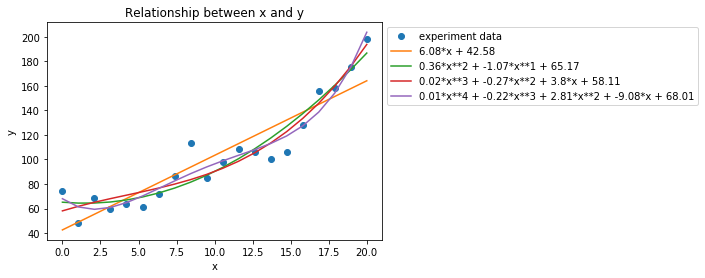

In [147]:
# plot a scatter plot of raw data
plt.plot(x, y, 'o', label='experiment data')


# plot the fitted linear function 
# the argument 'label' is used to print the equation of the line on the plot 
plt.plot(x, yfit1, label=f'{round(a[0],2)}*x + {round(a[1],2)}');
plt.plot(x, yfit2, label=f'{round(b[0],2)}*x**2 + {round(b[1],2)}*x**1 + {round(b[2],2)}');
plt.plot(x, yfit3, label=f'{round(c[0],2)}*x**3 + {round(c[1],2)}*x**2 + {round(c[2],2)}*x + {round(c[3],2)}');
plt.plot(x, yfit4, label=f'{round(d[0],2)}*x**4 + {round(d[1],2)}*x**3 + {round(d[2],2)}*x**2 + {round(d[3],2)}*x + {round(d[4],2)}');


# display the label 
# anchor the upper left corner of the legend to the point (1,1)
# 1 represents the height and width of the plot respectively
plt.legend(bbox_to_anchor=(1,1), loc="upper left")


# label the axes
plt.xlabel('x')
plt.ylabel('y')


# add a title 
plt.title('Relationship between x and y');

<a id='RMSE'></a>
We need a metric to assess the "goodness of fit". 


We will use the __root mean square error__.





### Root Mean Square Error (RMSE)
<a id='RootMeanSquareError'></a>
A frequently used measure of the differences between values predicted by a model or relationship and the real values. 

__Error/residual:__ the difference between:
- the observed value $y(x_i)$ at $x$ 
- the fitted value $a(x_i)$ at $x$

$$
\varepsilon_i = a(x_i) - y(x_i)
$$

For $N$ data points, the *sum* of the squared errors is 

$$S = \sum_{i=1}^{N}\varepsilon_i^2$$

The RMSE is computed as

$$RMSE=\sqrt{\frac{1}{N}S}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}{\varepsilon_i^2}}$$

Smaller RMSE indictes a better fit between raw and fitted data. 

We can optimise the fitted function by minimising the RMSE (sum of the squared errors).

Therefore, this optimisation approach is often referred to as the *least squares* approach. 

To find the RMSE of the example above:

Error, $\varepsilon_i = a(x_i) - y_i$

RMSE, $E=\sqrt{\frac{1}{N}\sum{\varepsilon_i^2}}$

In [141]:
# error
e = (yfit - y)

# RMSE
rmse = np.sqrt(np.sum(e**2)/ len(y))

Let's compare the RMSE of each fitted line. 

In [157]:
RMSE = []

for yfit in [yfit1, yfit2, yfit3, yfit4]:
    # error
    e = (yfit - y)
    
    # rmse
    rmse = np.sqrt(np.sum(e**2)/ len(y))

    # RMSE
    RMSE.append(round(rmse, 3))
    
print(RMSE)

print(f"The {np.argmin(RMSE) + 1} order polynomial gives the lowest error")

#print(list(enumerate(RMSE, 1)))

[16.528, 11.636, 11.063, 9.617]
The 4 order polynomial gives the lowest error


To compare our solutions to the raw data, for *each polynomial* we need to:
1. Found coefficients for 1st, 2nd, 3rd... order polynomials
1. Estimated y values using polynomials
1. Found RMSE for each polynomial
1. Compare RMSE values to determine fitted relationship with lowest error

We can use __format__ to change how a string is displayed...

In [33]:
r = 0.0123456
s = 0.2345678

# cast as a string
print(str(r))
print('%s' % r)
print('{}'.format(r))

# cast as a string, scientific notation
print('%E' % r)

# specify number of significant figures displayed
print('%.2E, %.1E' % (r, s))


0.0123456
0.0123456
0.0123456
1.234560E-02
1.23E-02, 2.3E-01


__Note:__ 
- Matplot lib automatically changes the colour of the line each time you plot. 
- This is much shorter than repeatedly writig out the code to plot each line of the figure.

<a id='FittingArbitraryFunction'></a>
### Fitting an Arbitrary Function

Curve fitted is not limited to polynomial functions. 

We can fit any function with unknown constants to the data using the function `curve_fit`.



Text(0,0.5,'y')

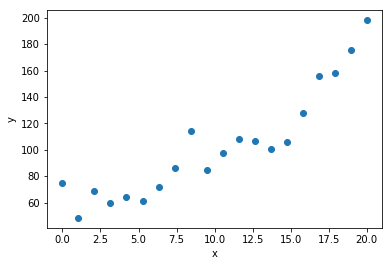

In [34]:
x = [0.000000000000000000e+00, 1.052631578947368363e+00, 2.105263157894736725e+00, 3.157894736842105310e+00,4.210526315789473450e+00, 5.263157894736841591e+00, 6.315789473684210620e+00,7.368421052631578760e+00,8.421052631578946901e+00,9.473684210526315042e+00,1.052631578947368318e+01,1.157894736842105132e+01,1.263157894736842124e+01,1.368421052631578938e+01,1.473684210526315752e+01, 1.578947368421052566e+01,1.684210526315789380e+01,1.789473684210526372e+01,1.894736842105263008e+01,2.000000000000000000e+01]
y = [7.445192947240600745e+01, 4.834835792411828947e+01, 6.873305436340778840e+01, 5.979576407972768948e+01,6.404530772390434379e+01,6.090548420541189500e+01, 7.157546008677115879e+01, 8.620253336570679892e+01, 1.138154622045899913e+02, 8.493639813028174501e+01, 9.783457330550828601e+01, 1.082064229481453594e+02, 1.063876210674365979e+02, 1.001971993955305038e+02, 1.061496321788094832e+02, 1.279575585921491836e+02, 1.556956405962417875e+02, 1.584164804859289859e+02, 1.753888794716459358e+02, 1.980941276403034124e+02]
x = np.array(x)
y = np.array(y)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

There are many Python functions for curve fitting. 

The function `curve_fit` can be used to fit a user-defined fuction. 

We first define a function that we want to fit e.g.
$$y = a e^{bx}$$


We write the function in the following format. 

We will learn more about this format when we study user-defined functions. 

In [159]:
def exponential(x, a, b): # function name and inputs
    y = a * np.exp(b*x)   # function
    return y              # output

`curve_fit` takes three input arguments:
 - the function to fit (in the format above)
 - the independent variable
 - the dependent variable
 
<br>
`curve_fit` returns two arguments:
 - an array with the optimised parameters
 - the covariance of the parameters (a statistical measure of accuracy)

In [165]:
from scipy.optimize import curve_fit

opt, cov = curve_fit(exponential, x, y)

# fitted data, any number of parameters is allowable
yfit = exponential(x, *opt)


# error
e = (yfit - y)


# RMSE
rmse = np.sqrt(np.sum(e**2)/ len(y))


# show the optimised parameters
print(f'RMSE = {round(rmse,3)}')

RMSE = 12.647


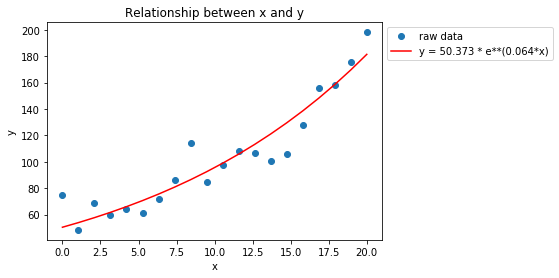

In [166]:
plt.plot(x, y,     'o', label='raw data')
plt.plot(x, y_fit, 'r', label= f'y = {round(opt[0],3)} * e**({round(opt[1],3)}*x)')

# display the label 
plt.legend(bbox_to_anchor=(1,1), loc="upper left")


# label the axes
plt.xlabel('x')
plt.ylabel('y')


# add a title 
plt.title('Relationship between x and y');

## Interpolation
<a id='Interpolation'></a>
>*Interpolation: <br>A method of constructing new data points within the range of a discrete set of known data points.*

For example, in a lab experiment, parameter is recorded at time=1 and time=2.

We can *interpolate* to find the value at time=1.2.  

Methods of interpolation include linear interpolation and polynomial, or spline curves.

Sometimes we can use the trendline of the data.

In other situations (e.g. where the data is not easily desribed by a function) it can be more accurate to interpolate between two data points. 



By generating (and plotting) the interpolated solutions computationally, we can assess the accuracy of the solution.

Suppose we have some data that describes the value of $y$ for a given  $x$.




Text(0,0.5,'y')

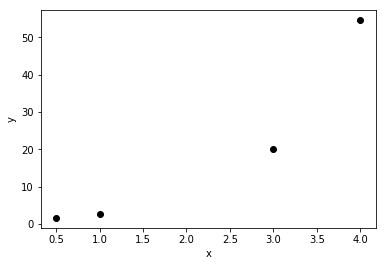

In [264]:
x = np.array([0.5,1,3,4])
y = np.array([1.648,  2.718, 20.086, 54.598])
plt.plot(x, y, 'ko')
plt.xlabel('x')
plt.ylabel('y')


Estimate the value of $y$ at $x=2$.

This is a simple interpolation problem.

In [265]:
from scipy.interpolate import interp1d

### Linear Interpolation
<a id='LinearInterpolation'></a>

The default mode for `scipy.interpolate.interp1d` is *linear* interpolation. 

If the two known points are given by the coordinates $(x_{0},y_{0})$ and  $(x_{1},y_{1})$ the linear interpolant is the straight line between these points. 

 

<img src="img/LinearInterpolation.svg" alt="Drawing" style="width: 200px;"/>




For a value x in the interval $(x_{0},x_{1})$, the value y along the straight line connecting the two known points is found from the equation for the gradient of the straight line:

$$\frac{y - y_0}{x - x_0} = \frac{y_1 - y_0}{x_1 - x_0}$$

Re-arranging gives:

$$y = \frac{y_0 (x_1 - x) + y_1(x - x_0)}{x_1 - x_0}$$

We will investigate two methods of interpolation using python:

- Method 1 : `interp1d`
- Method 2 : `splrep` and `splev` 

<br>Requirement : the independent variable must be *monotonically increasing*.

In [277]:
x = np.array([0.5,1,3,4])
y = np.array([1.648,  2.718, 20.086, 54.598])

In [278]:
# Method 1 : Linear Interpolation
from scipy.interpolate import interp1d
interp = interp1d(x, y, 'linear') # type = ‘linear’, ‘nearest’, ‘zero’, ‘cubic’...


# Method 2 : Ploynomial Interpolation
# from scipy.interpolate import splrep
# from scipy.interpolate import splev
# order_poly = 3
# interp = splrep(x, y, k=order_poly)


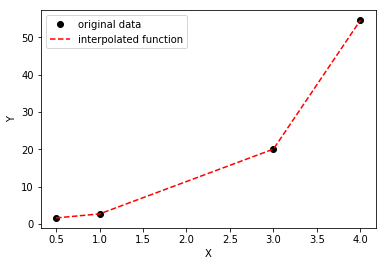

In [279]:
# plot the original data 
plt.plot(x, y, 'ko', label='original data')

# interpolated x data
x_i = np.linspace(0.5, 4, 200)   # create a finer range : start value, end value, no. of samples

# plot the interpolated data
plt.plot(x_i, interp(x_i), 'r--', label='interpolated function') # Method 1 : Linear Interpolation
#plt.plot(x_i, splev(x_i, interp), 'r--', label='interpolation') # Method 2 : Polynomail interpolation


plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


The function we sample above is actually:

$y(x) = e^x$ 

The linearly interpolated example is not very accurate.

Let's plot the actual function against the interpolated function to see how they compare:

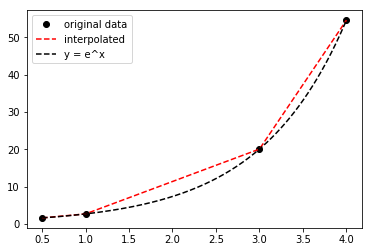

In [280]:
# plot the original data 
plt.plot(x, y, 'ko', label='original data')

# plot the interpolated data
plt.plot(x_i, interp(x_i), 'r--', label='interpolated ') # Method 1 : Linear Interpolation

# function data
plt.plot(x_i, np.exp(x_i), 'k--', label='y = e^x')

plt.legend()

We can improve the fit by changing the *type* of interpolation specified as an argument when calling the `interp1d` function. 

Here is the data fitted with a cubic function using Method 1:

In [281]:
# Method 1 : Linear Interpolation
from scipy.interpolate import interp1d
interp = interp1d(x, y, 'cubic') # type = ‘linear’, ‘nearest’, ‘zero’, ‘cubic’...


# # Method 2 : Ploynomial Interpolation
# from scipy.interpolate import splrep
# from scipy.interpolate import splev
# order_poly = 3
# interp = splrep(x, y, k=order_poly)


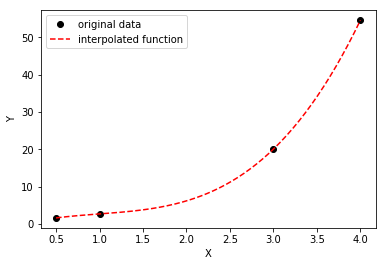

In [282]:
# plot the original data 
plt.plot(x, y, 'ko', label='original data')

# interpolated x data
x_i = np.linspace(0.5, 4, 200)   # create a finer range : start value, end value, no. of samples

# plot the interpolated data
plt.plot(x_i, interp(x_i), 'r--', label='interpolated function') # Method 1 : Linear Interpolation
#plt.plot(x_i, splev(x_i, interp), 'r--', label='interpolation') # Method 2 : Polynomial interpolation


plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


In [283]:
# actual function
print(np.exp(2))

#interpolation
print(interp(2))

7.38905609893065
6.216514285714284


### The Inverse Question
<a id='TheInverseQuestion'></a>
It is easy to interpolate a new value of y given a value of x. 

What if we want to know the value of x at which y=3? 

We can switch the order of the interpolation to solve this problem. 



__Note__
<br>One requirement is that the independent variable must be *monotonically increasing*.

This means that simply switching the order of x and y will generates an error *if* y does not increase monotonically with x. 

In [292]:
tmp = sorted(zip(y, x)) 
y = [t[0] for t in tmp]
x = [t[1] for t in tmp]

# convert x and y to numpy array 
x = np.asarray(x)
y = np.asarray(y)

In [293]:
# Method 1 : Linear Interpolation
from scipy.interpolate import interp1d
interp = interp1d(y, x, 'linear') # type = ‘linear’, ‘nearest’, ‘zero’, ‘cubic’...


# # Method 2 : Ploynomial Interpolation
# from scipy.interpolate import splrep
# from scipy.interpolate import splev
# order_poly = 2
# interp = splrep(y, x, k=order_poly)


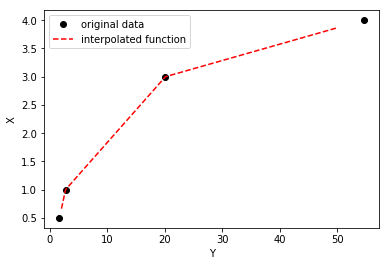

In [298]:
# plot the original data 
plt.plot(y, x, 'ko', label='original data')

# interpolated x data
y_i = np.linspace(2, 50, 200)   # create a finer range : start value, end value, no. of samples

# plot the interpolated data
plt.plot(y_i, interp(y_i), 'r--', label='interpolated function') # Method 1 : Linear Interpolation
#plt.plot(y_i, splev(y_i, interp), 'r--', label='interpolation') # Method 2 : Polynomail interpolation


plt.xlabel('Y')
plt.ylabel('X')
plt.legend()

In [299]:
# actual function
print(np.log(3))

#interpolation
interp(3)
# func = splrep(y, x, k=2)
# print(splev(3, func))


1.0986122886681098


array(1.03247351)

### Polynomial Spline Curve Interpolation
<a id='ImprovedInterpolation'></a>

__Method 2__ : A piecewise curve of a polynomial function is fitted over neighbouring points. 

Using this method, we can:
- specify the order of the polynomial.
- return the piecewise coefficients and transition points of the polynomial. 

`splrep` : Returns polynomial functions.   

`splev` : Coordinates defining the polynomial curve.

In [300]:
x = [0.000000000000000000e+00, 1.052631578947368363e+00, 2.105263157894736725e+00, 3.157894736842105310e+00,4.210526315789473450e+00, 5.263157894736841591e+00, 6.315789473684210620e+00,7.368421052631578760e+00,8.421052631578946901e+00,9.473684210526315042e+00,1.052631578947368318e+01,1.157894736842105132e+01,1.263157894736842124e+01,1.368421052631578938e+01,1.473684210526315752e+01, 1.578947368421052566e+01,1.684210526315789380e+01,1.789473684210526372e+01,1.894736842105263008e+01,2.000000000000000000e+01]
y = [7.445192947240600745e+01, 4.834835792411828947e+01, 6.873305436340778840e+01, 5.979576407972768948e+01,6.404530772390434379e+01,6.090548420541189500e+01, 7.157546008677115879e+01, 8.620253336570679892e+01, 1.138154622045899913e+02, 8.493639813028174501e+01, 9.783457330550828601e+01, 1.082064229481453594e+02, 1.063876210674365979e+02, 1.001971993955305038e+02, 1.061496321788094832e+02, 1.279575585921491836e+02, 1.556956405962417875e+02, 1.584164804859289859e+02, 1.753888794716459358e+02, 1.980941276403034124e+02]

In [301]:
# Method 1 : Linear Interpolation
# from scipy.interpolate import interp1d
# interp = interp1d(x, y, 'linear') # type = ‘linear’, ‘nearest’, ‘zero’, ‘cubic’...


# Method 2 : Ploynomial Interpolation
from scipy.interpolate import splrep
from scipy.interpolate import splev
order_poly = 3
interp = splrep(x, y, k=order_poly)


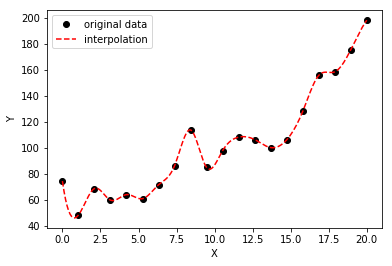

In [302]:
# plot the original data 
plt.plot(x, y, 'ko', label='original data')

# interpolated x data
x_i = np.linspace(0, 20, 200)   # create a finer range : start value, end value, no. of samples

# plot the interpolated data
#plt.plot(x_i, interp(x_i), 'r--', label='interpolated function') # Method 1 : Linear Interpolation
plt.plot(x_i, splev(x_i, interp), 'r--', label='interpolation') # Method 2 : Polynomail interpolation


plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


The coefficients deifning the polynomial curve:

In [303]:
# coefficients that define ppolynomial curve
F   = scipy.interpolate.PPoly.from_spline(interp)
# break points or knots
#print(F.x)
# coefficients at breakpoints
print(F.c)

[[-1.61590279e+01 -1.61590279e+01 -1.61590279e+01 -1.61590279e+01
   1.57973222e+01 -1.05842610e+01  8.89820116e+00 -6.83290826e+00
   9.98597151e+00 -2.53699462e+01  3.19252431e+01 -1.80774433e+01
   2.39976127e+00  1.92446747e-01  3.53429408e+00 -1.70525692e-01
   3.30932704e-01 -9.66294182e+00  1.17873095e+01 -3.81820768e+00
  -3.81820768e+00 -3.81820768e+00 -3.81820768e+00]
 [ 7.20063400e+01  7.20063400e+01  7.20063400e+01  7.20063400e+01
  -3.00506781e+01  1.98356026e+01 -1.35883794e+01  1.45112033e+01
  -7.06640178e+00  2.44682451e+01 -5.56473746e+01  4.51691826e+01
  -1.19174805e+01 -4.33928702e+00 -3.73156045e+00  7.42936821e+00
   6.89086603e+00  7.93591667e+00 -2.25786365e+01  1.46444461e+01
  -9.47054974e+00 -9.47054974e+00 -9.47054974e+00]
 [-8.26898003e+01 -8.26898003e+01 -8.26898003e+01 -8.26898003e+01
   5.63790886e+00 -5.11480225e+00  1.46122221e+00  2.43261578e+00
   1.02692489e+01  2.85869787e+01 -4.23315766e+00 -1.52628335e+01
   1.97389582e+01  2.62657136e+00 -5.869

Individual values on the interpolated curve can be found:

In [307]:
# find the interpolated value at x = 3
print(splev(3, interp))

61.035695728163816


The index `[::-1]` steps through an array in reverse order.

Pseudocode:

        [start : end : step-size=-1]

In [48]:
A = np.array([9,8,7,6,5,4,3,2,1])

print(A[::-1])

[1 2 3 4 5 6 7 8 9]


## Bar Charts and Histograms
<a id='BarChartsHistograms'></a>
### Bar Charts
<a id='BarCharts'></a>
To represent data as a bar chart, for example, the number of students in each year of a degree program:
```python
year_groups = ('B1', 'B2', 'B3', 'M1', 'M2')
num_students = (500, 332, 425, 300, 200)
```
1. Create an array of the position of each bar along the x-axis
1. Produce bar plot of data vs position on x axis 
1. Replace the x ticks with the field name
1. Add axis labels 

In [308]:
year_groups = ('B1', 'B2', 'B3', 'M1', 'M2')
num_students = (500, 332, 425, 300, 200)

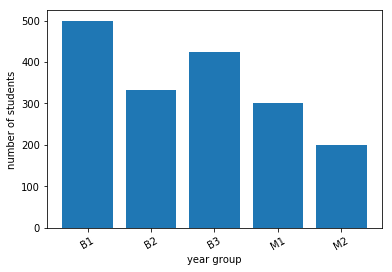

In [309]:
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(year_groups))

# Produce bar plot
plt.bar(x_pos, num_students);

# Replace the x ticks with the year group name
# Rotate labels 30 degrees
plt.xticks(x_pos, year_groups, rotation=30);

# Add axis labels 
plt.xlabel('year group');
plt.ylabel('number of students');


## Histograms
<a id='Histograms'></a>
We can visualise the distribution of the values using a histogram.

In a histogram, data is sorted into intervals (bins) along the horizontal axis. 

The number of values that fall within a 'bin' is then displayed on the vertical axis.

To create a histogram we first need a data set. 

For example we can use Numpy to generate a data set with:
- 4000 random values
- a mean value of zero 
- a standard deviation of 1
- a __normal__ (Gaussian) distribution (bell curve with 68% percent of values within one standard deviation of the mean)



In [51]:
# loc=mean, scale=stddev, size=num samples
x = np.random.normal(loc=0.0, scale=1.0, size=4000)  


We can visualise how `x` is distributed, using 20 bins. 

Matplotlib creates 20 bins of equal width, and computes the number of entries in each bin. 

Text(0,0.5,'frequency')

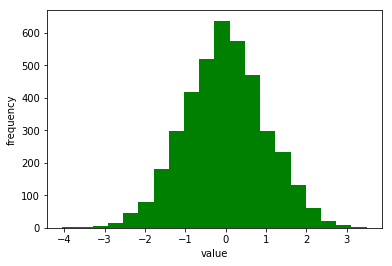

In [52]:
# Produce histogram with 20 bins
n, bins, patches = plt.hist(x, 20, facecolor='green');

# Add label
plt.xlabel('value')
plt.ylabel('frequency')



To view a list of:
- the bin intervals
- the number of values in each bin. 

In [53]:
print(bins)


[-4.05120964 -3.67385735 -3.29650506 -2.91915277 -2.54180048 -2.16444819
 -1.7870959  -1.40974361 -1.03239132 -0.65503903 -0.27768674  0.09966555
  0.47701784  0.85437013  1.23172242  1.6090747   1.98642699  2.36377928
  2.74113157  3.11848386  3.49583615]


__Try it yourself__
<br>In the example above try changing the number of bins and run the cells again to see the change in the bin intervals and number of values in ech bin. 

# Summary
<a id='Summary'></a>
- Matplotlib can be used to produce a wide range of styles of figures and plots of your data.
- The matplotlib library can be used to quicky produce simple plots to visualise and check your solutions to mathematical problems.
- This includes fitting a curve or a relationship to data imported from a delimted text file.
- Simple line and scatter plots can be customised using a `formatstring`
- Additional features such as a figure legend and axis labels can be set as arguments when creating plots.


<a id='TestYourselfExercises'></a>
# Review Exercises

Compete the exercises below.

Save your answers as .py files and email them to:
<br>philamore.hemma.5s@kyoto-u.ac.jp

### Review Exercise 1: Curve Fitting

The experimental data in `sample_data/signal_data.csv` resembles the function:

$$y = a \sin(x +b)$$

where $a$ and $b$ are two unknown constants.

1. Import the data from the file `sample_data/signal_data.csv`
1. Determine contants $a$ and $b$ that give a good fit of the function to the data.
1. Plot the raw data and the fitted data on the same graph. Label the data and include a legend.
1. Calculate the root mean square error of the fitted data and show the computed value as the plot title. 
1. Print the equation of the fitted line.
1. Save the figure in the sample_data folder as a .pdf file.

__Use comments in your code to explain what each part does.__


In [64]:
# Test-Yourself Exercise: Curve Fitting

y = 5.082535937794273 * e**(1.083182109981093*x)


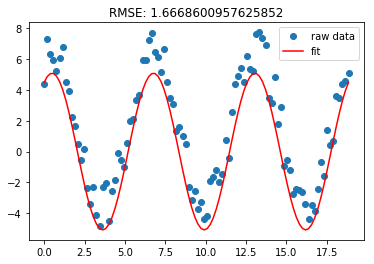

In [65]:
# Example Solution

from scipy.optimize import curve_fit

# function to fit to data (find values of a and b with closest fit)
def sin_func(x, a, b):
    y = a * np.sin(x + b) 
    return y

# function to compute RMSE
def RMSE(raw, fitted):
    e = (fitted - raw)
    return np.sqrt(np.sum(e**2)/ len(y))

# import data
s = np.loadtxt('sample_data/signal_data.csv', dtype=float, delimiter=',')

x = s[0]

y = s[1]

# plot data with label
plt.plot(x, y,     'o',     label='raw data')

# find optimised values of a and b
opt = curve_fit(sin_func, x, y)[0]

# generate fitted data
y_fit = sin_func(x, *opt)

# find RMSE
rmse = RMSE(y_fit, y)

# plot the fitted data as a line with label
# plt.plot(x, y,     'o',     label='raw data')
plt.plot(x, y_fit, 'r',    label='fit')

# plot legend
plt.legend(loc='best')

# plot title with RMSE
plt.title(f'RMSE: {rmse}')

# print the optimised parameters
print(f"y = {opt[0]} * e**({opt[1]}*x)")

# save the plot
plt.savefig("sample_data/my-plot.pdf")

### Review Exercise 2: Interpolation

The experimental data in the table shows the temperature recorded at 1m depth intervals in a lake.

A sudden temperature change is observed between 7m and 8m.

Use first order polynomial interpolation (also called linear interpolation), to estimate the temperature at 7.5m.

Use second order polynomial interpolation (also called quadratic interpolation), to estimate the temperature at 7.5m.

By plotting your solutions, decide which solution fits the data better.


|Temperature (degrees C) |Depth (m)|
|------------------------|---------|
|19.1                    |        0|        
|19.1                    |       -1|         
|19                      |       -2|          
|18.8                    |       -3|          
|18.7                    |       -4|          
|18.3                    |       -5|             
|18.2                    |       -6|          
|17.6                    |       -7|          
|11.7                    |       -8|          
|9.9                     |       -9|             
|9.1                     |      -10|          


__Use comments in your code to explain what each part does.__


In [66]:
# Test-yourself Exercise: Interpolation

depth = - 7.5, temperature = 14.65 : 1 order polynomial
depth = - 7.5, temperature = 14.743075639255014 : 2 order polynomial


Text(0,0.5,'temperature')

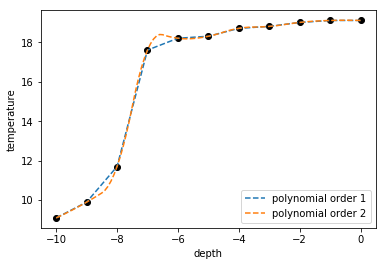

In [67]:
# Example Solution
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import splrep
from scipy.interpolate import splev
import scipy.interpolate

# original data
y = [19.1, 19.1, 19, 18.8, 18.7, 18.3, 18.2, 17.6, 11.7, 9.9, 9.1][::-1]
x = [0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10][::-1]

plt.plot(x, y, 'ko')

# range of values for x axis
interval = 0.1
x_int = np.arange(x[0], x[-1]+interval, interval)

# # interpolated data
order_poly = 1
func = splrep(x, y, k=order_poly)
y_int = splev(x_int, func)
plt.plot(x_int, y_int, '--', label=f'polynomial order {order_poly}')
T = splev(-7.5, func)
print(f'depth = - 7.5, temperature = {T} : {order_poly} order polynomial')

# # interpolated data
order_poly = 2
func = splrep(x, y, k=order_poly)
y_int = splev(x_int, func)
plt.plot(x_int, y_int, '--', label=f'polynomial order {order_poly}')
T = splev(-7.5, func)
print(f'depth = - 7.5, temperature = {T} : {order_poly} order polynomial')

# # plot labels and legend
plt.legend()
plt.xlabel('depth')
plt.ylabel('temperature')
#plt.show()

